In [27]:
import json
import seaborn as sns
import csv
import pandas as pd
import random

# Programming for AI & Data Science
# Workshop 4
## 699795

# Programming for AI & Data Science
# Workshop 4
## Pandas, Seaborn, and Misc

### Aims of the workshop
Last week we looked at File IO: Opening raw files, reading and writing to them with context managers, and more importantly how we can use the CSV and JSON libraries to read/write File Formats for various purposes. In addition, we briefly explored Numpy as a foundational data structure for numerical computing.


This workshop will explore the Pandas and Seaborn library for Data Analysis and Visualisation. Whilst we won’t be covering everything there is to cover with Pandas ( a lot! ), we can at least begin to utilise it to load in data, and initially explore it. As Seaborn is built on-top of Pandas, that is to say it understands the Dataframe and Series objects from Pandas, we can pass those new objects in to create rich and robust visualisations without worrying about implementation specific details. We will be utilising a lot of concepts which we’ve covered previously, combining them to achieve these visualisations. Along the way we’ll also introduce some miscellaneous concepts which you should now be able to understand, which didn’t exactly fit anywhere before.

Please see ‘Useful Information’ below on how to lookup certain Python functionality. The concept behind this workshop is about discovery, and experimentation surrounding topics covered so far.

Feel free to discuss the work with peers, or with any member of the teaching staff.

----

## Pandas
As always, we should save workshop session in a Notebook. Name it something memorable, such as “Workshop 4”.

### Exercise 1:
You may need to install pandas. If you receive a `ModuleNotFound` error at any point, this indicates the library isn’t installed. You can install this via command-prompt by executing the following: 
```
pip install pandas.
```
If the library is already installed, but you want a newer version, you can pass `--upgrade` flag to the command. This might be useful.

E.g.
```
pip install pandas --upgrade.
```
Note: If you get Permission Denied. Try adding the `--user` flag as well.

You can obtain a list of installed python packages/libraries by using:
```
pip list
```
This will also provide a list of versions as well. The output should look similar to the following.
```
C:\Users\Brian>pip list
Package             Version
------------------- -------
argon2-cffi         20.1.0
attrs               21.2.0
backcall            0.2.0
bleach              4.0.0
cffi                1.14.6
colorama            0.4.4
debugpy             1.4.1
decorator           5.0.9
```
If we wanted to install a specific version of a library we could do something like the following:
```
pip install pandas==0.25.3
``` 
### Requirements files
When dealing with Python projects, we might be using several libraries. It might be important that these have specific versions too. When we give our Projects or notebook files we need a way to communicate what libraries we’re using, and what their versions are.

Python has a solution to this called the __requirements.txt__ file. It is a list of python packages and their associated versions.

Pip supports installation from a file instead of specifying each package individually. This is done by the -r flag, and specifying the file.
```
pip install -r requirements.txt
```
An example of a requirements.txt file might look like the following:
```
cycler==0.10.0        	# via matplotlib
kiwisolver==1.2.0     	# via matplotlib
matplotlib==3.2.1
numpy==1.18.5
pandas==1.0.4
pyparsing==2.4.7      	# via matplotlib
python-dateutil==2.8.1	# via matplotlib, pandas
pytz==2020.1          	# via pandas
scipy==1.4.1          	# via seaborn
seaborn==0.10.1
six==1.15.0           	# via cycler, python-dateutil
```

---

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas --upgrade

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip list

Package                  Version
------------------------ -----------
anaconda                 0.0.1.1
anyio                    3.6.2
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
arrow                    1.2.3
asttokens                2.2.1
attrs                    22.2.0
backcall                 0.2.0
beautifulsoup4           4.11.1
bleach                   6.0.0
cffi                     1.15.1
colorama                 0.4.6
comm                     0.1.2
debugpy                  1.6.6
decorator                5.1.1
defusedxml               0.7.1
executing                1.2.0
fastjsonschema           2.16.2
fqdn                     1.5.1
idna                     3.4
ipykernel                6.20.2
ipython                  8.9.0
ipython-genutils         0.2.0
ipywidgets               8.0.4
isoduration              20.11.0
jedi                     0.18.2
Jinja2                   3.1.2
jsonpointer              2.3
jsonschema               4.17.3
jupyter               

In [12]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


---
### Exercise 2
Take your __duck_collection.json__ from last week, and load this file in. Using the JSON library, interpret this file so that you get a List of Dictionaries back. Remember if you need to import a library, try grouping them at the top of the Notebook, as the first cell.

```
ducks
```
> [{'first_name': 'Davey',  
  'last_name': 'McDuck',  
  'location': "Rob's Office",  
  'insane': True,  
  'followers': 12865,  
  'following': 120,  
  'weapons': ['wit', 'steely stare', 'devilish good looks'],  
  'remorse': None},  
 {'first_name': 'Jim',  
  'last_name': 'Bob',  
  'location': 'Turing Lab',  
  'insane': False,
  'followers': 123,  
  'following': 5000,  
  'weapons': ['squeak'],  
  'remorse': None},  
 {'first_name': 'Celest',  
  'last_name': '',  
  'location': 'Throne Room',
  

---

In [7]:
with open('duck_collection.json', mode='r') as duck_collection:
    W4_duckfile= json.load(duck_collection)
print(W4_duckfile)

[{'first_name': 'Davey', 'last_name': 'McDuck', 'location': "Rob's Office", 'insane': True, 'followers': 12865, 'following': 120, 'weapons': ['wit', 'steely stare', 'devilish good looks'], 'remorse': None}, {'first_name': 'Jim', 'last_name': 'Bob', 'location': 'Turing Lab', 'insane': False, 'followers': 123, 'following': 5000, 'weapons': ['squeak'], 'remorse': None}, {'first_name': 'Celest', 'last_name': '', 'location': 'Throne Room', 'insane': True, 'followers': 40189, 'following': 1, 'weapons': ['politics', 'dance moves', 'chess grandmaster', 'immortality']}]


---
## Sorting with basic and more complex data types
### Exercise 3
Python has a built-in function called sorted which we can use to sort collections, such as Lists and Dictionaries.

If we take some List of numbers, sorted will return them in ascending order.
```
some_number = [ 3, 1, 2, 7, 9, 4, 10 ]
print( sorted(some_number) )
```
Additionally, sorted has a number of optional parameters we can pass in. One such parameter is defined as reverse, which allows us to go in descending order instead.
```
print( sorted(some_number, reverse=True) )
```
This works well for simple collections such as Lists, where the ‘<’ operator is defined between data elements. In our list example, each element here is an integer. And we know that int < int makes sense semantically.

---

In [3]:
group_of_num = [ 3, 1, 2, 7, 9, 4, 10, 50, 20, 100 ]
print( sorted(group_of_num) )

[1, 2, 3, 4, 7, 9, 10, 20, 50, 100]


In [4]:
print( sorted(group_of_num, reverse=True) )

[100, 50, 20, 10, 9, 7, 4, 3, 2, 1]


---
### Exercise 4
Our issue comes when wanting to sort more complex data structures. By default Python checks if the < operator is defined. However, for our duck collection we just read in, each element in that list is a dictionary (representing a duck).

Let’s try sorting this:
```
print( sorted(ducks) )
```
```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
~\AppData\Local\Temp/ipykernel_15912/2449917408.py in <module>
     17 'last_name': '',
     18 'location': 'Throne Room'}]
---> 19 print( sorted(ducks) )

TypeError: '<' not supported between instances of 'dict' and 'dict'

```
This is a problem. Thankfully sorted is clever, and allows us to provide a means to tell the function HOW to compare the two entries.

We can provide a function to the key parameter of the sorted function. From previous workshops we know that functions are first-class data objects. We can pass them around just like we can with integers and strings and any other fundamental data type.

We need to define a function which accepts the element to compare, in our case this is a dictionary, and return the actual value to be compared against.

Example:
```
def comp_ducks( d ):
	return d['first_name']

sorted( ducks, key=comp_ducks )
```
We can make a function, accepting a dictionary (our `duck`), and returning a specific value from said duck which will have the < operator defined. If we wanted to sort our ducks based on their `first_name` this is how we would do so. In essence, we are telling Python what key to sort on, rather than it assuming it’s the dictionary as a whole!

> [{'first_name': 'Celest',  
'last_name': '',  
'location': 'Throne Room',  
'insane': True,  
'followers': 40189,  
'following': 1,  
'weapons': ['politics', 'dance moves', 'chess grandmaster', 'immortality']},  
{'first_name': 'Davey',  
'last_name': 'McDuck',  
'location': "Rob's Office",  
'insane': True,  
'followers': 12865,  
'following': 120,  
'weapons': ['wit', 'steely stare', 'devilish good looks'],  
'remorse': None},  
{'first_name': 'Jim',  
'last_name': 'Bob',  
'location': 'Turing Lab',  
'insane': False, 'followers': 123,  
'following': 5000,  
'weapons': ['squeak'],  
'remorse': None},


You can now see that Celest is first, then Davey, then Jim. Alphabetical order, just as we would expect.

Note: We can make this syntactically simpler, by use of a `lambda` function. These are a one-time use kind of function, which just means we don’t need to define them in the global scope and clutter things and come up with names. They are inherently nameless.
```
sorted( ducks, key=lambda d: d['first_name'] )
```
Same thing, takes an input and returns the value at the key `‘first_name’`. If I wanted to sort on a different member of our dictionary, I can put the key there.

E.g.
```
sorted( ducks, key=lambda d: d['followers'] )
```
Or modify the function before:
```
def comp_ducks( d ):
	return d['followers']

sorted( ducks, key=comp_ducks )
```
Standard convention here is to use the `lambda` approach; however, either way works. If you try the new followers key sorting, you should obtain Jim, Davey, then Celeste.

---

In [8]:
print( sorted(W4_duckfile) )

TypeError: '<' not supported between instances of 'dict' and 'dict'

In [9]:
def comp_ducks( d ):
    return d['first_name']

sorted( W4_duckfile, key=comp_ducks )

[{'first_name': 'Celest',
  'last_name': '',
  'location': 'Throne Room',
  'insane': True,
  'followers': 40189,
  'following': 1,
  'weapons': ['politics', 'dance moves', 'chess grandmaster', 'immortality']},
 {'first_name': 'Davey',
  'last_name': 'McDuck',
  'location': "Rob's Office",
  'insane': True,
  'followers': 12865,
  'following': 120,
  'weapons': ['wit', 'steely stare', 'devilish good looks'],
  'remorse': None},
 {'first_name': 'Jim',
  'last_name': 'Bob',
  'location': 'Turing Lab',
  'insane': False,
  'followers': 123,
  'following': 5000,
  'weapons': ['squeak'],
  'remorse': None}]

In [25]:
sorted( W4_duckfile, key=lambda d: d['first_name'] )

[{'first_name': 'Celest',
  'last_name': '',
  'location': 'Throne Room',
  'insane': True,
  'followers': 40189,
  'following': 1,
  'weapons': ['politics', 'dance moves', 'chess grandmaster', 'immortality']},
 {'first_name': 'Davey',
  'last_name': 'McDuck',
  'location': "Rob's Office",
  'insane': True,
  'followers': 12865,
  'following': 120,
  'weapons': ['wit', 'steely stare', 'devilish good looks'],
  'remorse': None},
 {'first_name': 'Jim',
  'last_name': 'Bob',
  'location': 'Turing Lab',
  'insane': False,
  'followers': 123,
  'following': 5000,
  'weapons': ['squeak'],
  'remorse': None}]

---
## Titanic Dataset
### Exercise 5
On canvas, you will find a dataset included. We will be using this for some initial analysis and visualisation with Pandas Seaborn.

Download __titanic.csv__, and put it in the same folder as your notebook. Just as you have done with previous data files. This dataset is a bit more complicated than what we looked at in the lectures this week. This is a Dataset about passengers on the Titanic, including whether they survived the sinking. For this module, I have modified the dataset for you to remove some tricky issues.

---

---
### Exercise 6
Using the `read_csv` function, read in the __titanic.csv__ file. This function accepts a string, as the filepath. Pandas will handle all the necessary file opening, reading, interpreting, and closing for you. 

The return of this function should be a Dataframe object. This is one of the custom Types which Pandas provides for us.

1.	Read in the Titanic CSV file
2.	Verify that it is of type `pandas.core.frame.DataFrame`

```
	PassengerId	Survived	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked
0	1	0	3	Braund, Mr. Owen Harris	male	22.0	1	0	A/5 21171	7.2500	A001	S
1	2	1	1	Cumings, Mrs. John Bradley (Florence Briggs Th...	female	38.0	1	0	PC 17599	71.2833	C85	C
2	3	1	3	Heikkinen, Miss. Laina	female	26.0	0	0	STON/O2. 3101282	7.9250	C85	S
3	4	1	1	Futrelle, Mrs. Jacques Heath (Lily May Peel)	female	35.0	1	0	113803	53.1000	C123	S
4	5	0	3	Allen, Mr. William Henry	male	35.0	0	0	373450	8.0500	C123	S
```

> <class 'pandas.core.frame.DataFrame'>

---

In [10]:
titanic = pd.read_csv('titanic.csv')
titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,A001,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C50,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
type(titanic)

pandas.core.frame.DataFrame

---
### Exercise 7
We can obtain the columns of the DataFrame with the columns attribute. Print the columns of the dataframe.

This can be achieved by printing `.columns` directly, or by doing a for loop over the columns values and printing each member. Where df here represents the dataframe object read in from Ex 6.
```
print( df.columns )
# or
for c in df.columns:
	print(c)
``` 
> Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],  
       dtype='object'}

> PassengerId    
Survived    
Pclass    
Name    
Sex    
Age    
SibSp    
Parch    
Ticket    
Fare    
Cabin    
Embarked

---

In [24]:
print( titanic.columns )

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [25]:
for c in titanic.columns:
    print(c)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


---
### Exercise 8

We can index a specific column that we want to look at by use of `[]`. This is similar to how you’ve already indexed Dictionaries within Python.

Index the ‘Fare’ column and assign this to a variable. This should be of type Series, and will represent the entire column. Where each item represents a Fare somebody paid for their ticket.

Note: The strings are case-sensitive here. ‘Fare’ != ‘fare’
```
fares = df['Fare']
print( type(fares) )
print(fares)
``` 
```
<class 'pandas.core.series.Series'>  
0       7.2500  
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...
886    13.0000
887    30.0000
888    23.4500
889     7.7500
Name: fare, Length: 891, dtype: float64
```

---

In [26]:
fares = titanic['Fare']
print( type(fares) )
print(fares)

<class 'pandas.core.series.Series'>
0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64


---
## Statistical measures of Data Series & Useful functionality
Pandas Series objects have many defined methods, available at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

### Exercise 9
Calculate and display:
1.	The count of Fares. This should provide the number of non-null Fare records you hold (valid numbers).
2.	The mean of the Fares.
3.	The median Fare.
4.	The sum of all the Fares. ( sum method ).
5.	The min and max of the Fares.
6.	The standard deviation of the Fare price. Commonly abbreviated to std.
7.	The 50% Quantile of Fare. This is effectively the mid-point of the range. The function accepts a number from 0 -> 1, where 1 represents 100%.

> 891  
32.204207968574636  
14.4542  
28693.9493  
0.0 512.3292  
49.6934286971809
14.4542

 
---

In [33]:
# print( fares.isna().sum() )
print( fares.count() )
print( fares.mean() )
print( fares.median() )
print( fares.sum() )
print( fares.min() )
print( fares.max() )
print( fares.std() )
print( fares.quantile() )



891
32.204207968574636
14.4542
28693.9493
0.0
512.3292
49.6934285971809
14.4542


---
### Exercise 10
Modify the simple output of Ex 9, and use f-strings to print a more user-friendly output. E.g “There are 891 Fare records”, this should put the expression itself into the f-string.
```
print( f"There are {fares.count()} Fare records" )
```

---

In [34]:
print( f"There are {fares.count()} Fare records" )
print( f"The mean value in Fare records is {fares.mean()}" )
print( f"The median value in Fare records is {fares.median()}" )
print( f"The Sum of Fare records is {fares.sum()}" )
print( f"The minimum value in Fare records is {fares.min()}" )
print( f"The maximum value in Fare records is {fares.max()}" )
print( f"The standard deviation in Fare records is {fares.std()}" )
print( f"The 50th Quantile in Fare records is {fares.quantile()}" )

There are 891 Fare records
The mean value in Fare records is 32.204207968574636
The median value in Fare records is 14.4542
The Sum of Fare records is 28693.9493
The minimum value in Fare records is 0.0
The maximum value in Fare records is 512.3292
The standard deviation in Fare records is 49.6934285971809
The 50th Quantile in Fare records is 14.4542


---
### Exercise 11
If we wanted to round the Mean in our example, we might consider using the `round()` function passing the float, and the number of decimal places.

However, f-strings also allow us to specify the number of places to round to in the `{}` template itself.
```
print( f"Mean Fare: {fares.mean()}" )
print( f"Mean Fare: {fares.mean():.2f}" )
```
We can use `:` and then specify some special characters, notably `.2f` will round to 2 decimal places.

For more options here, you may find https://mkaz.blog/code/python-string-format-cookbook/ a useful comprehensive example.

1.	Using this f-string approach, round all floats to 2 decimal places.

---

In [35]:
print( f"Mean Fare: {fares.mean()}" )
print( f"Mean Fare: {fares.mean():.2f}" )

Mean Fare: 32.204207968574636
Mean Fare: 32.20


In [36]:
print( f"The mean value in Fare records is {fares.mean():.2f}" )
print( f"The median value in Fare records is {fares.median():.2f}" )
print( f"The Sum of Fare records is {fares.sum():.2f}" )
print( f"The minimum value in Fare records is {fares.min():.2f}" )
print( f"The maximum value in Fare records is {fares.max():.2f}" )
print( f"The standard deviation in Fare records is {fares.std():.2f}" )
print( f"The 50th Quantile in Fare records is {fares.quantile():.2f}" )

The mean value in Fare records is 32.20
The median value in Fare records is 14.45
The Sum of Fare records is 28693.95
The minimum value in Fare records is 0.00
The maximum value in Fare records is 512.33
The standard deviation in Fare records is 49.69
The 50th Quantile in Fare records is 14.45


---
### Exercise 12

Index the Embarked column, and calculate the mode of this column. What is the most common Embarked location?

Remember: Mode doesn’t return a single item, but many. You may wish to index `[0]` here, or iterate through the mode output and print each individually.

---

In [45]:
Embarked = titanic['Embarked']
Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [44]:
print(Embarked.mode())

0    S
Name: Embarked, dtype: object


---
### Exercise 13

We can use the `.unique()` function of a Data Series object to find all the types of values in a column which is categoric. Examples of this could be eye colour, or hair colour. Non-continuous data.

Find the unique entries for our Embarked Column.

---

In [47]:
Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

---
### Exercise 14
This doesn’t tell us how many of each exist in our dataset yet. We can use the `value_counts` function to obtain the value and the number of entries which exist.

Get the count of Embarked, then compare it against the `value_counts`.
 
```
print( df['Embarked'].count() )
print( df['Embarked'].value_counts() )
```
> 891  
S  644  
C  169  
Q   78
Name: Embarked, dtype: int64

---

In [48]:
print( titanic['Embarked'].count() )
print( titanic['Embarked'].value_counts() )

891
S    644
C    169
Q     78
Name: Embarked, dtype: int64


---
### Exercise 15
We can use the method describe of a DataFrame and a Series object to view the data itself, where it will automatically calculate properties about the data for us. This is useful if we want to inspect this data ourselves.
```
bdf.describe()
```
---
```
      Passengerid    Survived      Pclass        Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.00000  891.000000  891.000000  891.000000
 mean  446.000000    0.383838    2.308642   29.58156    0.523008    0.381594   32.204208
  std  257.353842    0.486592    0.836071   14.55459    1.102743    0.806057   49.693429
  min    1.000000    0.000000    1.000000    0.42000    0.000000    0.000000    0.000000
  25%  223.500000    0.000000    2.000000   20.00000    0.000000    0.000000    7.910400
  50%  446.000000    0.000000    3.000000   28.00000    0.000000    0.000000   14.454200
  75%  668.500000    1.000000    3.000000   38.00000    1.000000    0.000000   31.000000
  max  891.000000    1.000000    3.000000   80.00000    8.000000    6.000000  512.329200
```
```
df['Fare'].describe()
```
```
count    891.000000
 mean     32.204208
  std     49.693429
  min      0.000000
  25%      7.910400
  50%     14.454200
  75%     31.000000
  max    512.329200
Name: Fare, dtype: float64
```

---


In [49]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.58156,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.55459,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.00000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.00000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.00000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.00000,8.000000,6.000000,512.329200


In [50]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

---
### Exercise 16:
We can use Pandas to write some expressions which can then be used to filter the Dataframe itself.

We can find all entries where Age meets a certain criteria. E.g Age >= 18, to find all adults. Something we don’t have a column for!

E.g.
```
df['Age'] >= 18
```
This should provide a List of True/ False values, for each record in our dataset. You can verify this. Check the type. It should be a Series. Call `.count()` on it, you should have the same number as you have rows in the original dataframe. ( This should be 891 )

---

In [53]:
titanic['Age'] >= 18


0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: Age, Length: 891, dtype: bool

In [54]:
print(type(titanic['Age'] >= 18))

<class 'pandas.core.series.Series'>


In [56]:
Adults_titanic = titanic['Age'] >= 18
Adults_titanic.count()

891

---
### Exercise 17
We can now use this Series of True/False values to index our original dataframe. In essence, grab only the rows where True exists (where it matches out criteria).
```
df[ df['Age'] >= 18 ]
```
If we output that dataframe, we should see that the count is now less than 891. And all the records here should represent adults.

1.	Using this technique, find all passengers who paid more than 15 for their ticket.

---

In [57]:
titanic[ titanic['Age'] >= 18 ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,A001,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C50,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [83]:
titanic[ titanic['Fare'] > 15 ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,E46,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,E46,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,C50,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,C50,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,B42,S


---
### Exercise 18
Let’s consider the mode of the ‘Sex’ column. We have an issue with this column. If we call unique on this, we can see the problem.
```
df['Sex'].unique()
```
> array(['male', 'female', nan], dtype=object
 
There is a `nan` value introduced. This might cause us some difficulty when plotting things later. Likewise, other columns might have issues.

We can use `df.isnull().any()` to find any columns which contain erroneous entries that might cause problems.

```
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex             True
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool
```

---

In [58]:
titanic['Sex'].mode()

0    male
Name: Sex, dtype: object

In [59]:
titanic['Sex'].unique()

array(['male', 'female', nan], dtype=object)

In [61]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex             True
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

---
### Exercise 19
To fix this, we have two options:
1.	We could fix it in the CSV file itself, saving out a cleaner CSV file.
2.	Use Pandas/Seaborn just before plotting to patch the data momentarily (doesn’t change the file on disk).

For this exercise, let’s assume we can’t change the CSV file. We can use the `.fillna()` function on a column to fix that issue.
```
df['Sex'].fillna( value='male', inplace=True)
```
We provide a default value to patch it with, the mode of the column. We also specify inplace=True, as we want to modify the original dataframe, `df`. Otherwise this call just returns a new dataframe.

Fixed:
```
df['Sex'].unique()
```
> array(['male', 'female'], dtype=object

---

In [63]:
titanic['Sex'].fillna( value='male', inplace=True)

In [65]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

---
## Seaborn
Seaborn has three high-level functions for plotting. Each of these functions uses many things under-the-hood. Primarily these are split into three types:
1.	Relational plots (scatterplot, lineplot)
2.	Distributions (histplot, kdeplot, ecdfplot, rugplot)
3.	Categorical plots (stripplot, swarmplot, boxplot, violinplot, pointplot, barplot)
 
In the lecture this week, we looked at using scatterplot directly. However, we could also have used relplot, the higher-level one, and Seaborn would have figured out to use scatterplot under-the-hood.

In the lecture we noticed that the AxesSubPlot type came back from scatterplot, which wasn’t as usable as the FacetGrid that our displot output. If we use relplot instead, we should get back a FacetGrid which is a figure-level operation. Whereas the sub-boxes here operate on the axes-level which doesn’t always have nice functionality.

---
### Exercise 20
Make sure that seaborn is imported (at the top of your Notebook). We will be using `sns` as the alias here.

---

---
### Exercise 21
Let’s pick two continuous values to plot against each other. Remember, we can refer back to the columns attribute to see what we have available. This will be a form of multivariate analysis; how one variable is against another.

We can use `relplot`, which is the more general plotting function. This will return a FacetGrid and avoid the problem we encountered in the lecture.
```
sns.relplot(data=df, x='Age', y='Fare')
```
We provide relplot with the Dataframe to draw from. The column name to use for the x-axis, and the column name for the y-axis. The only downside here is we don’t have any lines of best-fit.

---

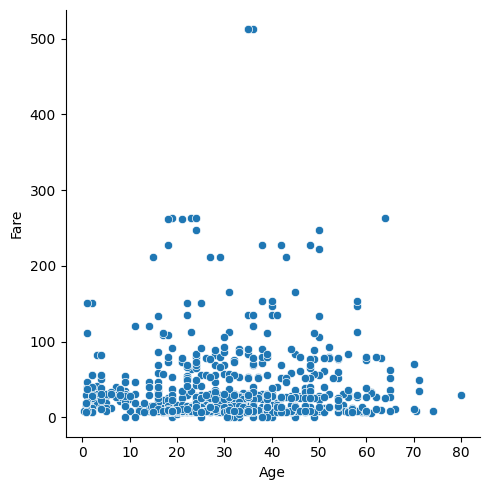

In [11]:
Titanice_AgeVsFare = sns.relplot(data=titanic, x='Age', y='Fare')

---
### Exercise 22
We also looked at Univariate analysis, let’s look at Fare and see the distribution of ticket prices. Using `displot()`, plot the Fare column. For now, leave any bins and binwidth to their default values.

---

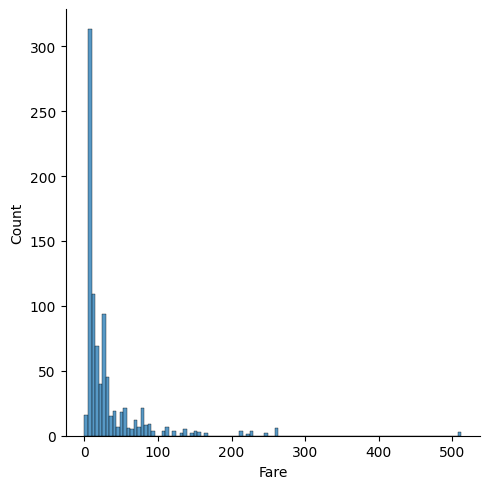

In [12]:
Titanice_CountVsFare = sns.displot(titanic, x='Fare')

---
### Exercise 23
In Exercise 22, we can see that’s a lot of bars. Let’s try to tweak that. Modify your function call from Exercise 22, and change the following:
1.	Specify the number of bins=20
2.	Instead of bins, specify the `binwidth` to be 50.

  
---

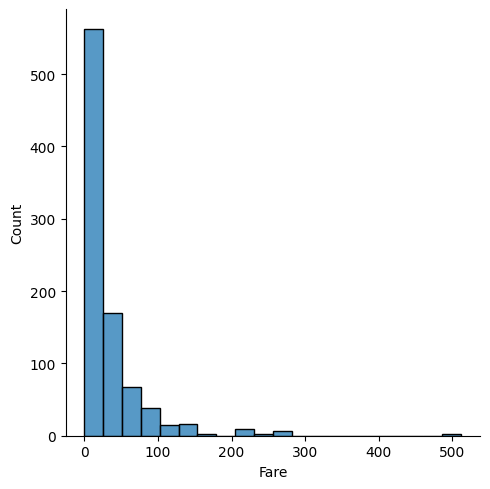

In [13]:
Titanice_CountVsFare1 = sns.displot(titanic, x='Fare', bins=20)

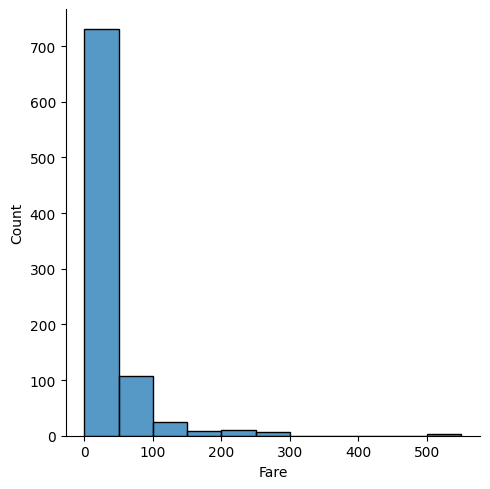

In [14]:
Titanice_CountVsFare2 = sns.displot(titanic, x='Fare', binwidth=50)

---
### Exercise 24
We don’t yet understand who pays what fares. Using the concept of conditioning from the lectures, we can colour these plots with some categoric variable. In our dataset for the Titanic we have `Pclass` which represents first-class, second-class, and third-class (whatever that means.)

Modify your displot calls from above, and this time add `hue=` for the Pclass column.
 
As we can see, most of the tickets paid for near and above the 100 mark, are almost exclusively purchased by first-class passengers. However, the vast majority of tickets sold are low-price, which seem primarily bought by third-class and some second-class passengers.

---

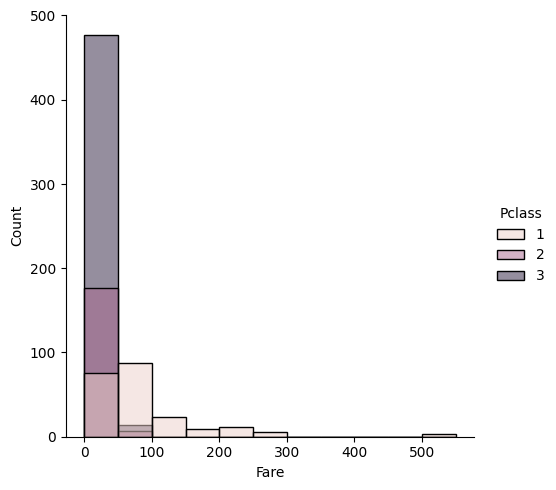

In [15]:
Titanice_CountVsFare3 = sns.displot(titanic, x='Fare', binwidth=50, hue='Pclass')

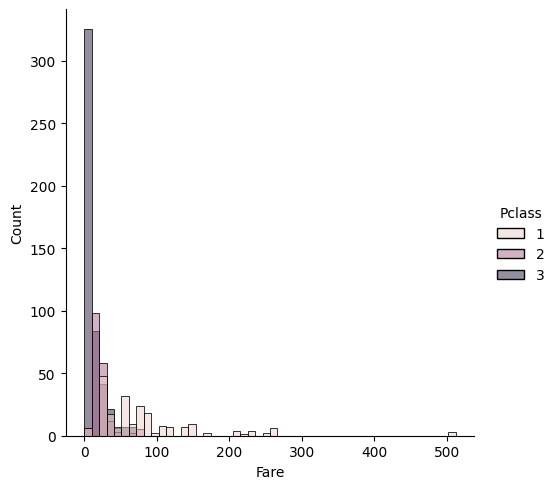

In [16]:
Titanice_CountVsFare4 = sns.displot(titanic, x='Fare', bins=50, hue='Pclass')

---
### Exercise 25
Seaborn has a useful utility function which allows us to load datasets from the library itself, without having to download them and put them somewhere ourselves. Feel free to inspect the dataset you load in here with things we’ve already covered.

Useful:  
https://seaborn.pydata.org/generated/seaborn.get_dataset_names.html#seaborn.get_dataset_names

1.	Call the function `sns.get_dataset_names()` to obtain a list of valid datasets which Seaborn knows about.
2.	Choose a Dataset you’re interested in.
3.	Call `sns.load_dataset()` passing it the string for the dataset you're interested in.

E.g. I’ll choose the Tips dataset about restaurants in America, and the tipping culture.
 
```
print( sns.get_dataset_names() )
```
> ['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic'] 
```
total_bill	tip	sex	smoker	day	time	size
0	16.99	1.01	Female	No	Sun	Dinner	2
1	10.34	1.66	  Male	No	Sun	Dinner	3
2	21.01	3.50	  Male	No	Sun	Dinner	3
3	23.68	3.31	  Male	No	Sun	Dinner	2
4	24.59	3.61	Female	No	Sun	Dinner	4
...	...	...	...	...	...	...	...
239	29.03	5.92	  Male	No	Sat	Dinner	3
240	27.18	2.00	Female Yes	Sat	Dinner	2
241	22.67	2.00	  Male Yes	Sat	Dinner	2
242	17.82	1.75	  Male	No	Sat	Dinner	2
243	18.78	3.00	Female	No	Thur	Dinner	2
244 rows × 7 columns
```

---

In [76]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [78]:
sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


---
### Exercise 26
Using relplot, plot the `total_bill` against the tip, conditioned on whether the meal was on a Thursday, Friday, Saturday, or Sunday. 
1.	Assign a variable to the output of this plot (the handle). We’ll use this later.

Hint: There’s a column for this already!

 
---

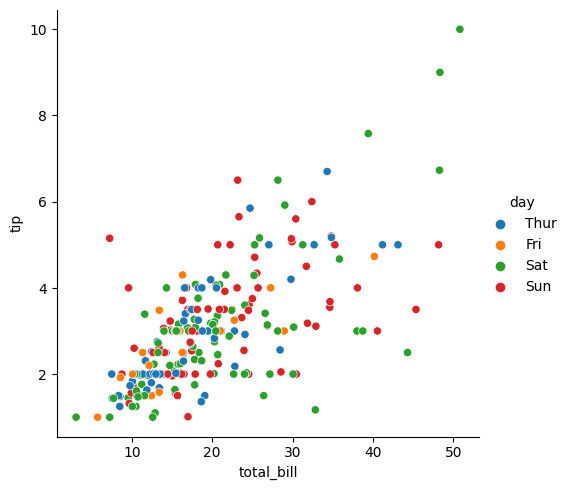

In [19]:
tip_seabornplot= sns.relplot(data=sns.load_dataset('tips'), x='total_bill', y='tip', hue='day')

In [82]:
tip_seabornplot


---
### Exercise 27
With Seaborn, and the handle to the FacetGrid we have the ability to modify the various aspects about the plot. The most useful might be the names of the axes, a potential title for the figure, and the legend (sometimes it’s in a bad spot).

Warning: These are valid for FacetGrid objects only. Therefore, they need to be using those high-level plotting functions, <u>relplot</u>, <u>displot</u>, and <u>catplot</u>.

The issue is that if we try to update the plot after it’s drawn, we can’t go back.

We can use a Jupyter Notebook magic command to dynamically update the plot when changes happen.
```
%matplotlib inline
t_plt = sns.relplot(data=tips_ds, x='total_bill', y='tip', hue='day')
t_plt.set_axis_labels("Total Meal Cost ($)", "Total Tip ($)")
```
`%matplotlib inline` tells Jupyter and Seaborn how to display this nicely.
Secondly, we can call the function `set_axis_labels`, passing in custom strings to use. Previously it used the variable name, which might not be the nicest.

Alternatively, we could use `set_xlabels`, and `set_ylabels` if we wanted to.

---

In [84]:
%matplotlib inline
tip_seabornplot.set_axis_labels("Total Meal Cost ($)", "Total Tip ($)")

---
## Saving Figures out.
As we saw in the Lecture, any visualisation which is shown in the Jupyter Notebook can be saved programmatically. This is useful if you were to do many plots and wanted to output them all in a folder.

As we saw, the savefig function is a figure-level method (defined on FacetGrid objects). So any of the big boxes (relplot, displot, catplot) will provide these easily for you.

---
### Exercise 28
Save the `t_plt` figure we created in Ex 27. Call `savefig`, and provide a file location, and filename to save it.

E.g.
```
t_plt.savefig('./tipping.png')
```
Open up the image in an image viewer, and check that everything is as expected. The data points, the conditioning, and the axis labels.

---

In [85]:
tip_seabornplot.savefig('./tipping.png')

---
### Exercise 29
If we wanted to save many plots, but all in one place, we might want to use a data structure which can hold names against objects. This sounds like a Dictionary.

Create a dictionary where each key is the filename, and the value at that key is a handle to a figure.

E.g.
```
figures_to_save = {}
figures_to_save["./tipping.png"] = t_plt
figures_to_save["./fares_univariate.png"] = fares_plt
# Etc. Do this for all the plots we've done so far!
# You'll need handles to the,, go and change the code to add some.
```

---

In [22]:
figures_to_save = {}
figures_to_save["./tipping.png"] = tip_seabornplot
figures_to_save["./countvsfare1.png"] = Titanice_CountVsFare1
figures_to_save["./countvsfare2.png"] = Titanice_CountVsFare2
figures_to_save["./countvsfare3.png"] = Titanice_CountVsFare3
figures_to_save["./countvsfare4.png"] = Titanice_CountVsFare4
figures_to_save["./agevsfare.png"] = Titanice_AgeVsFare

figures_to_save

{'./tipping.png': <seaborn.axisgrid.FacetGrid at 0x281b8edacd0>,
 './countvsfare1.png': <seaborn.axisgrid.FacetGrid at 0x281b7c5c6d0>,
 './countvsfare2.png': <seaborn.axisgrid.FacetGrid at 0x281b7d8d750>,
 './countvsfare3.png': <seaborn.axisgrid.FacetGrid at 0x281b7ba6610>,
 './countvsfare4.png': <seaborn.axisgrid.FacetGrid at 0x281b58e3310>,
 './agevsfare.png': <seaborn.axisgrid.FacetGrid at 0x281b593acd0>}

---
### Exercise 30
Using this dictionary, iterate over it, and call `savefig` on each value, passing it the key as the file path.

---

In [23]:
for k,v in figures_to_save.items():
    v.savefig(k)
    

---
## You Must be Quackers
### Exercise 31

Let’s revisit the ducks. From Ex2 we should have loaded in some ducks (I called my List of them ducks). At the moment we have a problem. Our ducks don’t have any ages! Let’s resolve that.

The usual format us humans like to use for date of birth is DD/MM/YYYY. E.g 30 / 10 / 1979

1.	Generate random numbers for day, month, and year. Remember that they have bounds. I.e. You cannot possibly have Day 736. Or Month 13. Or Year 2021 (at least as far as DOB is concerned.
    a.	How might you handle the fact that some months have more days than others? Maybe consider generating the month first, then using some conditionals?
    ```
    if mm in [ 9, 4 6, 11 ]:
    ```
    b.	Is zero a valid day?
    c.	If you want to go crazy and consider leap years, you are welcome to

2.	Put these into a List, in order of day, month, year.
3.	Use the following string methods for joining to combine them into a convenient DOB format.

In Python we have two string methods which are particularly useful when breaking down, or building up strings. These are `.split()` and `.join()`

We can make a string, whereby a phrase or character are put between each element of our iterable (List). However, make sure the List has strings in it! It won’t cast by default.

E.g.
```
print( "-".join( [ "1", "2", "3", "4", "5", "6" ] ) )

print( "mississippi".join( [ "1", "2", "3", "4", "5", "6" ] ) )
```
> 1-2-3-4-5-6  
1mississippi2mississippi3mississippi4mississippi5mississippi6

If we print the now randomised birthday of each duck, the List we made looks something like:

> [31, 7, 1982]  
[2, 10, 1946]
[4, 12, 1971]

If we now use these with our .join approach, to put the ‘/’ between.
```
print( "/".join([str(dd), str(mm), str(yyyy)]) ) # This could also be assigned to a variable don't forget!
``` 
> 31/7/1982    
2/10/1946  
4/12/1971

This doesn’t look right. We want the days and months to be padded appropriately. E.g 2 -> 02.

Luckily, the f-strings we were dealing with earlier can help us out here.
```
dd = f"{dd:02d}"
mm = f"{mm:02d}"
```
This should now mean that everything is at least 2 digits, and will pad them if not.

> 31/07/1982    
02/10/1946  
04/12/1971

4.	The result of each line is a string in itself. Assign this to a “dob” key on the individual duck. The DOB calculation could be a function which does it all for you and returns a string in the right format.
```
for d in ducks:
	# Calculate DOB HERE. Lots of lines.
	d["dob"] = dob_value
```

---

In [32]:
def gen_dob():
    yyyy = random.randint(1900, 1999)
    if yyyy % 4 == 0:
        mm = random.randint(1, 12)
        if mm == 2:
            dd = random.randint(1, 29)
        elif mm == 4 or 6 or 9 or 11:
            dd = random.randint(1, 30)
        else:
            dd = random.randint(1, 31)

    else:
        mm = random.randint(1, 12)
        if mm == 4 or mm == 6 or mm == 9 or mm == 11:
            dd = random.randint(1, 30)
        else:
            dd = random.randint(1, 31)
    Result = "/".join([f"{dd:02d}", f"{mm:02d}", str(yyyy)])
    return Result

In [33]:
for d in W4_duckfile: 
    d["DoB"] = gen_dob()

In [34]:
print(W4_duckfile)

[{'first_name': 'Davey', 'last_name': 'McDuck', 'location': "Rob's Office", 'insane': True, 'followers': 12865, 'following': 120, 'weapons': ['wit', 'steely stare', 'devilish good looks'], 'remorse': None, 'DoB': '04/02/1924'}, {'first_name': 'Jim', 'last_name': 'Bob', 'location': 'Turing Lab', 'insane': False, 'followers': 123, 'following': 5000, 'weapons': ['squeak'], 'remorse': None, 'DoB': '26/08/1970'}, {'first_name': 'Celest', 'last_name': '', 'location': 'Throne Room', 'insane': True, 'followers': 40189, 'following': 1, 'weapons': ['politics', 'dance moves', 'chess grandmaster', 'immortality'], 'DoB': '27/12/1911'}]


---
### Exercise 32

What if we’re given a date and asked to break it back down. 02/10/1946 is obviously not a number. We can use `.split()` here.
```
breakdown = "02/10/1946".split('/') # Split the string (could be a variable), based on /. Will return a List.
```
We can access the days with `breakdown[0]`, months with `[1]`, and years with `[2]`. If we try to cast the day into an integer it hopefully should covert 02 -> 2 for us.

1.	Read through each Duck again
2.	Grab the new key you just added, for the dob.
3.	Split this dob based on ‘/’
4.	For day and month convert them to `int` and print them.
```
for d in ducks:
  	 
	breakdown = d['dob'].split('/')
	dd = int( breakdown[0] )
	mm = int( breakdown[1] )
	yyyy = int( breakdown[2] )
    
	print(dd, mm, yyyy)
```
5.	Calculate how old each duck will be today.  

 E.g. You could do 2020 - yyyy; however, that could be off by ± 11months and 30 days! Imagine if the duck was only born this year, it would be 0 years old. But we might want to celebrate it’s first month.  
 
  Your calculation will have to double check how many months it has been as well as days.  

  Hint: What if doing current month - duck dob month is a negative number? How do we need to handle this?

Example:

31 / 07 / 1982 would be:

    -	2020 - 1982 = 38 years
    -	10 - 07 = 3 months
    -	23 - 31 = -8 days.

Only by looking at months could we definitely say it’s been 38 years. E.g. If we had negative months, then we’ve not actually completed a full year yet! Similarly, we look at days when determining if we’ve completed full months. In this case, we’re 8 days shy of hitting 3 months.


---

In [46]:
current_day= 25
current_month =2
current_year = 2023

for d in W4_duckfile:
       
    breakdown = d['DoB'].split('/')
    dd = int( breakdown[0] )
    mm = int( breakdown[1] )
    yyyy = int( breakdown[2] )
    
    print(d['first_name'], f'age is {current_year - yyyy} years {current_month - mm} months {current_day - dd} days ' )

Davey age is 99 years 0 months 21 days 
Jim age is 53 years -6 months -1 days 
Celest age is 112 years -10 months -2 days 
